In [12]:
import pandas as pd
test_data=pd.read_csv(r"C:\Users\MY PC\Downloads\nlp-getting-started (1)\test.csv")

In [11]:
train_data=pd.read_csv(r"C:\Users\MY PC\Downloads\nlp-getting-started (1)\train.csv")

In [10]:
sample_submission=pd.read_csv(r"C:\Users\MY PC\Downloads\nlp-getting-started (1)\sample_submission.csv")


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [52]:
import re

import nltk
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


<Axes: xlabel='target', ylabel='count'>

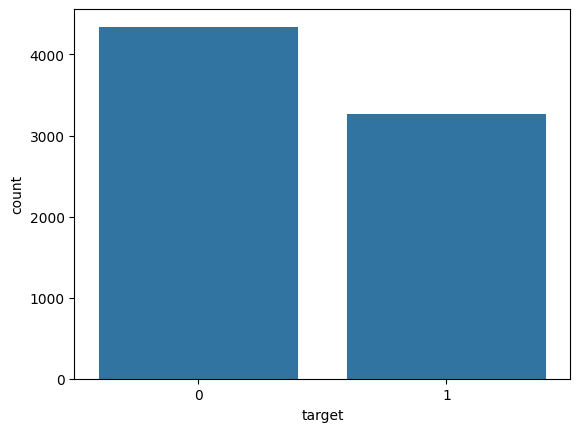

In [14]:
sns.countplot(x = 'target', data = train_data)

In [15]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [16]:
pd.set_option('display.max_colwidth', None)

In [17]:
train_data.insert(4, 'clean text', train_data['text'])

In [18]:
#remove html tags
train_data['clean text'] = train_data['clean text'].apply(lambda x: re.sub(r'<.*?>', '', x))

In [19]:
#compile emojis
emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F" #emoticons
                        u"\U00002702-\U000027B0" #dingbats
                        u"\U0001F680-\U0001F6FF" #transport and map symbols
                        u"\U0001F300-\U0001F5FF" #symbols and pictographs
                        u"\U0001F1E0-\U0001F1FF" #flags (iOS)
                        u"\U000024C2-\U0001F251" #enclosed characters
                        "]+")

#remove emojis
train_data['clean text'] = train_data['clean text'].apply(lambda x: emoji_pattern.sub(r'', x))

In [20]:
#remove twitter handles
train_data['clean text'] = train_data['clean text'].apply(lambda x: re.sub(r'@\S+', ' ', x))
train_data

,id,keyword,location,text,clean text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California","13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [21]:
#remove URLs
train_data['clean text'] = train_data['clean text'].apply(lambda x: re.sub(r'http\S+', '', x))
train_data

,id,keyword,location,text,clean text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California","13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,Two giant cranes holding a bridge collapse into nearby homes,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [22]:
#remove punctuations and symbols
train_data['clean text'] = train_data['clean text'].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
train_data

,id,keyword,location,text,clean text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",people receive wildfires evacuation orders in California,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,Two giant cranes holding a bridge collapse into nearby homes,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,The out of control wild fires in California even in the Northern part of the state Very troubling,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,M UTC km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,Police investigating after an e bike collided with a car in Little Portugal E bike rider suffered serious non life threatening injuries,1


In [23]:
df_train=train_data

In [27]:
#remove stopwords
import nltk
nltk.download('stopwords')
df_train['clean text'] = df_train['clean text'].apply(lambda x: [word for word in x.split() if word not in stopwords.words('english')])
df_train

[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,id,keyword,location,text,clean text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,"[Our, Deeds, Reason, earthquake, May, ALLAH, Forgive, us]",1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]",1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,"[All, residents, asked, shelter, place, notified, officers, No, evacuation, shelter, place, orders, expected]",1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California","[people, receive, wildfires, evacuation, orders, California]",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,"[Just, got, sent, photo, Ruby, Alaska, smoke, wildfires, pours, school]",1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,"[Two, giant, cranes, holding, bridge, collapse, nearby, homes]",1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,"[The, control, wild, fires, California, even, Northern, part, state, Very, troubling]",1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,"[M, UTC, km, S, Volcano, Hawaii]",1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,"[Police, investigating, e, bike, collided, car, Little, Portugal, E, bike, rider, suffered, serious, non, life, threatening, injuries]",1


In [29]:
#lemmatise text
import nltk
nltk.download('omw-1.4')
df_train['clean text'] = df_train['clean text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
df_train

[nltk_data] Downloading package omw-1.4 to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...


,id,keyword,location,text,clean text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,"[Our, Deeds, Reason, earthquake, May, ALLAH, Forgive, u]",1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]",1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,"[All, resident, asked, shelter, place, notified, officer, No, evacuation, shelter, place, order, expected]",1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California","[people, receive, wildfire, evacuation, order, California]",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,"[Just, got, sent, photo, Ruby, Alaska, smoke, wildfire, pours, school]",1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,"[Two, giant, crane, holding, bridge, collapse, nearby, home]",1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,"[The, control, wild, fire, California, even, Northern, part, state, Very, troubling]",1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,"[M, UTC, km, S, Volcano, Hawaii]",1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,"[Police, investigating, e, bike, collided, car, Little, Portugal, E, bike, rider, suffered, serious, non, life, threatening, injury]",1


In [30]:
#combine words in each row into a single string
df_train['clean text'] = df_train['clean text'].apply(lambda x: ' '.join(word for word in x))
df_train

,id,keyword,location,text,clean text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds Reason earthquake May ALLAH Forgive u,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,All resident asked shelter place notified officer No evacuation shelter place order expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",people receive wildfire evacuation order California,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent photo Ruby Alaska smoke wildfire pours school,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,Two giant crane holding bridge collapse nearby home,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,The control wild fire California even Northern part state Very troubling,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,M UTC km S Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,Police investigating e bike collided car Little Portugal E bike rider suffered serious non life threatening injury,1


In [31]:
def clean_text(text):
        
        #remove html tags
        text = re.sub('<*?>', '', text)
        
        #remove emojis
        emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F" #emoticons
                        u"\U00002702-\U000027B0" #dingbats
                        u"\U0001F680-\U0001F6FF" #transport and map symbols
                        u"\U0001F300-\U0001F5FF" #symbols and pictographs
                        u"\U0001F1E0-\U0001F1FF" #flags (iOS)
                        u"\U000024C2-\U0001F251" #enclosed characters
                        "]+")
        
        text = emoji_pattern.sub(r'', text)
        
        #remove twitter handles
        text = re.sub(r'@\S+', '', text)
        
        #remove URLs
        text = re.sub(r'http\S+', '', text)
          #remove punctuations and symbols
        text = re.sub(r'[^a-zA-Z]+', ' ', text)
        
        #convert all letters to lowercase
        text = text.lower()
        
        #remove stopwords
        text = [word for word in text.split() if word not in stopwords.words('english')]
        
        #lemmatise text
        text = [WordNetLemmatizer().lemmatize(word) for word in text]
        
        #recombine row entries into a single string
        text = ' '.join(word for word in text)
        
        return text

In [32]:
df_test=test_data

In [33]:
#clean text of test dataset and create new column for cleaned text
df_test['clean text'] = df_test['text'].apply(lambda x: clean_text(x))

In [34]:
#obtain training and test datasets of text data and target values
x_train = df_train['clean text'].values
x_test = df_test['clean text'].values
y_train = df_train['target']

In [35]:
x_train

array(['Our Deeds Reason earthquake May ALLAH Forgive u',
       'Forest fire near La Ronge Sask Canada',
       'All resident asked shelter place notified officer No evacuation shelter place order expected',
       ..., 'M UTC km S Volcano Hawaii',
       'Police investigating e bike collided car Little Portugal E bike rider suffered serious non life threatening injury',
       'The Latest More Homes Razed Northern California Wildfire ABC News'],
      dtype=object)

In [37]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [38]:
x_test

array(['happened terrible car crash',
       'heard earthquake different city stay safe everyone',
       'forest fire spot pond goose fleeing across street cannot save',
       ..., 'green line derailment chicago',
       'meg issue hazardous weather outlook hwo',
       'cityofcalgary activated municipal emergency plan yycstorm'],
      dtype=object)

In [36]:
#initialise tf-idf vectoriser to enable fitting of training text data
tfidf_vectoriser = TfidfVectorizer()

#fit and transform the text data for the training set
tfidf_xtrain = tfidf_vectoriser.fit_transform(x_train)

#vectorise words in the text data of the test set
tfidf_xtest = tfidf_vectoriser.transform(x_test)

In [39]:
tfidf_xtrain

<7613x13413 sparse matrix of type '<class 'numpy.float64'>'
	with 68602 stored elements in Compressed Sparse Row format>

In [40]:
tfidf_xtest

<3263x13413 sparse matrix of type '<class 'numpy.float64'>'
	with 24388 stored elements in Compressed Sparse Row format>

In [41]:
#initialise random forest model
rf_classifier = RandomForestClassifier(random_state = 42)

#fit data to the model
rf_classifier.fit(tfidf_xtrain, y_train)

RandomForestClassifier(random_state=42)

In [42]:
#predict class labels for the test data
y_pred = rf_classifier.predict(tfidf_xtest)

In [43]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [45]:
nlp_disaster_tweets_submission=sample_submission

In [46]:
nlp_disaster_tweets_submission['target'] = y_pred

In [47]:
nlp_disaster_tweets_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [49]:
nlp_disaster_tweets_submission.to_csv('submission.csv', index = False)
nlp_disaster_tweets_submission.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.361937
std,3146.427221,0.480634
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


In [50]:
nlp_disaster_tweets_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
